In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_06zT/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_06zT/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_06zT/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_06zT/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
N_Bins = 9
a = np.geomspace(0.04,0.6,N_Bins+1)
print("["),
for i in a:
    print("%1.3f,"%(i)),
print("]")

[ 0.040, 0.054, 0.073, 0.099, 0.133, 0.180, 0.243, 0.329, 0.444, 0.600, ]


**root to numpy**

In [3]:
Corrs = ROOT_to_nparray()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [4]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)
#Plot_UB_Subtraction(Corrs)

**Pedestal Subtraction**

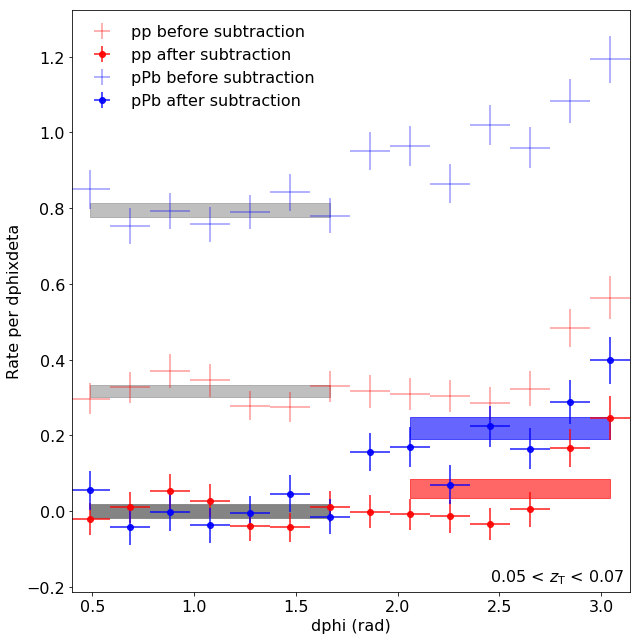

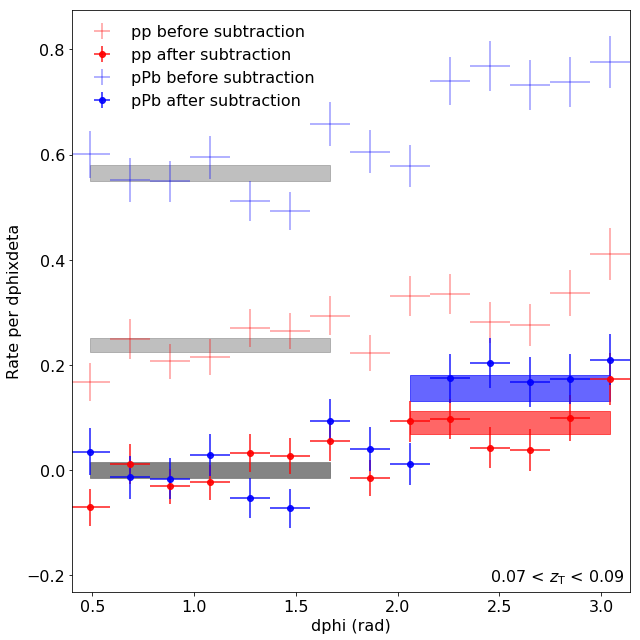

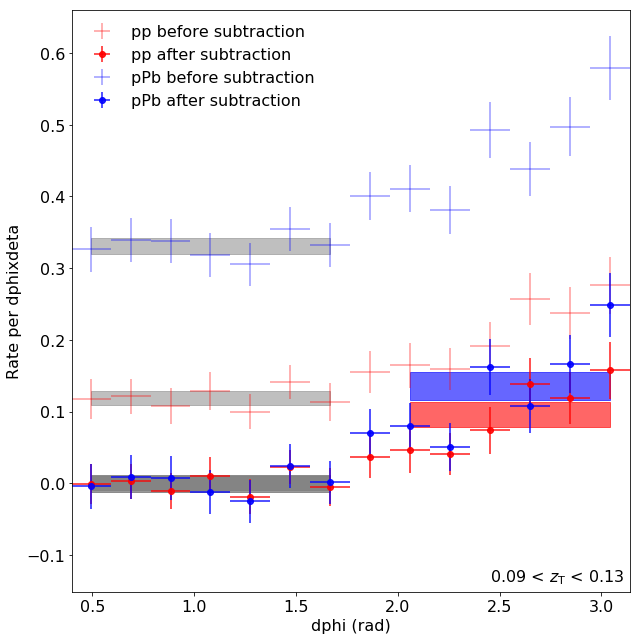

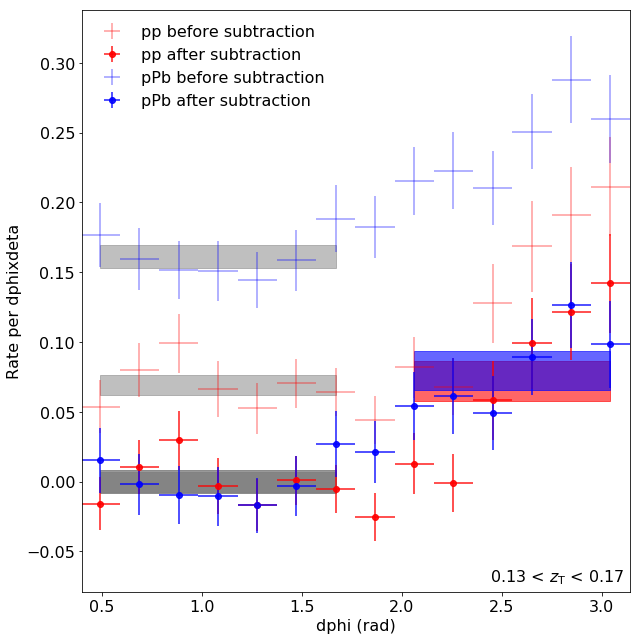

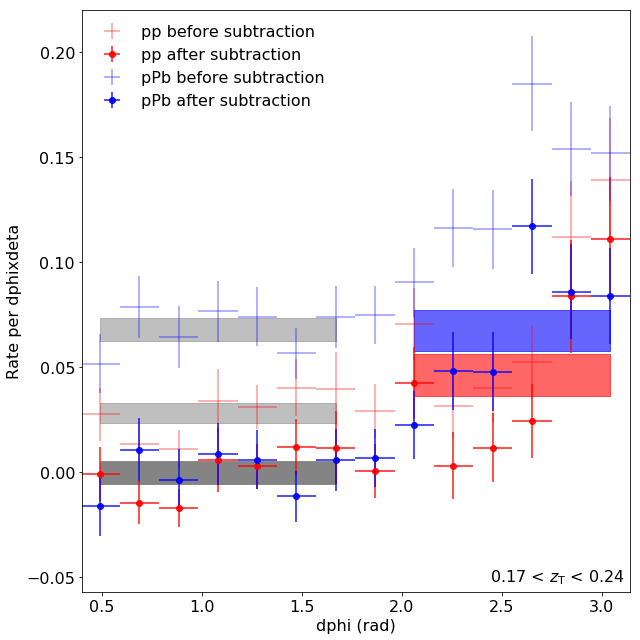

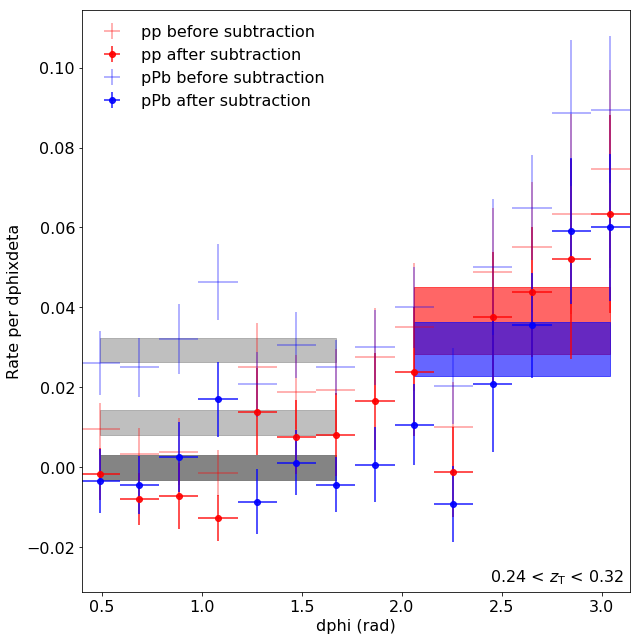

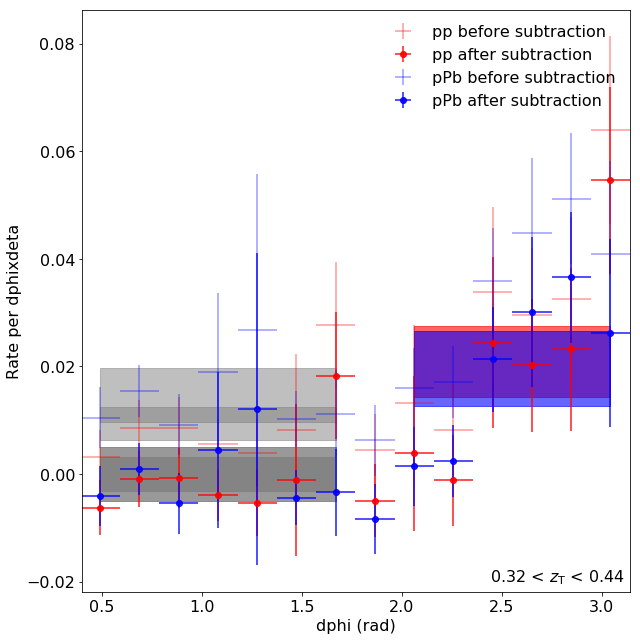

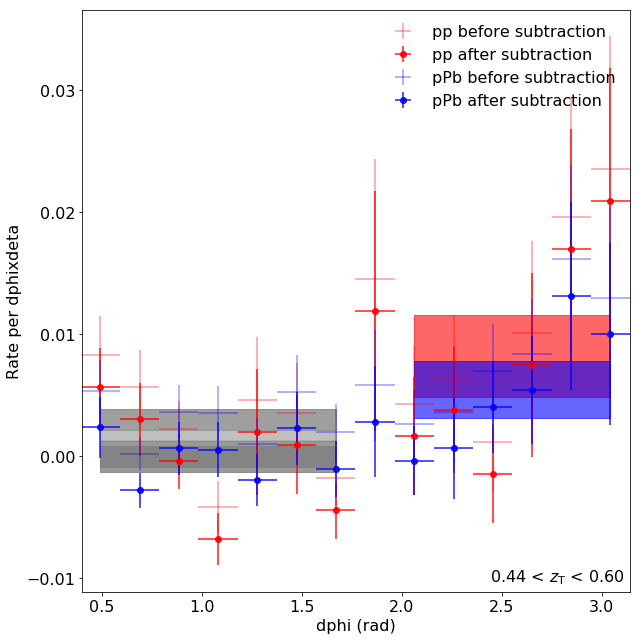

In [5]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
for izt in range(NzT):
    fig = plt.figure(figsize=(8,7))
    #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
    GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
    plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

In [6]:
Ped_Sub_After_Cs(Corrs)

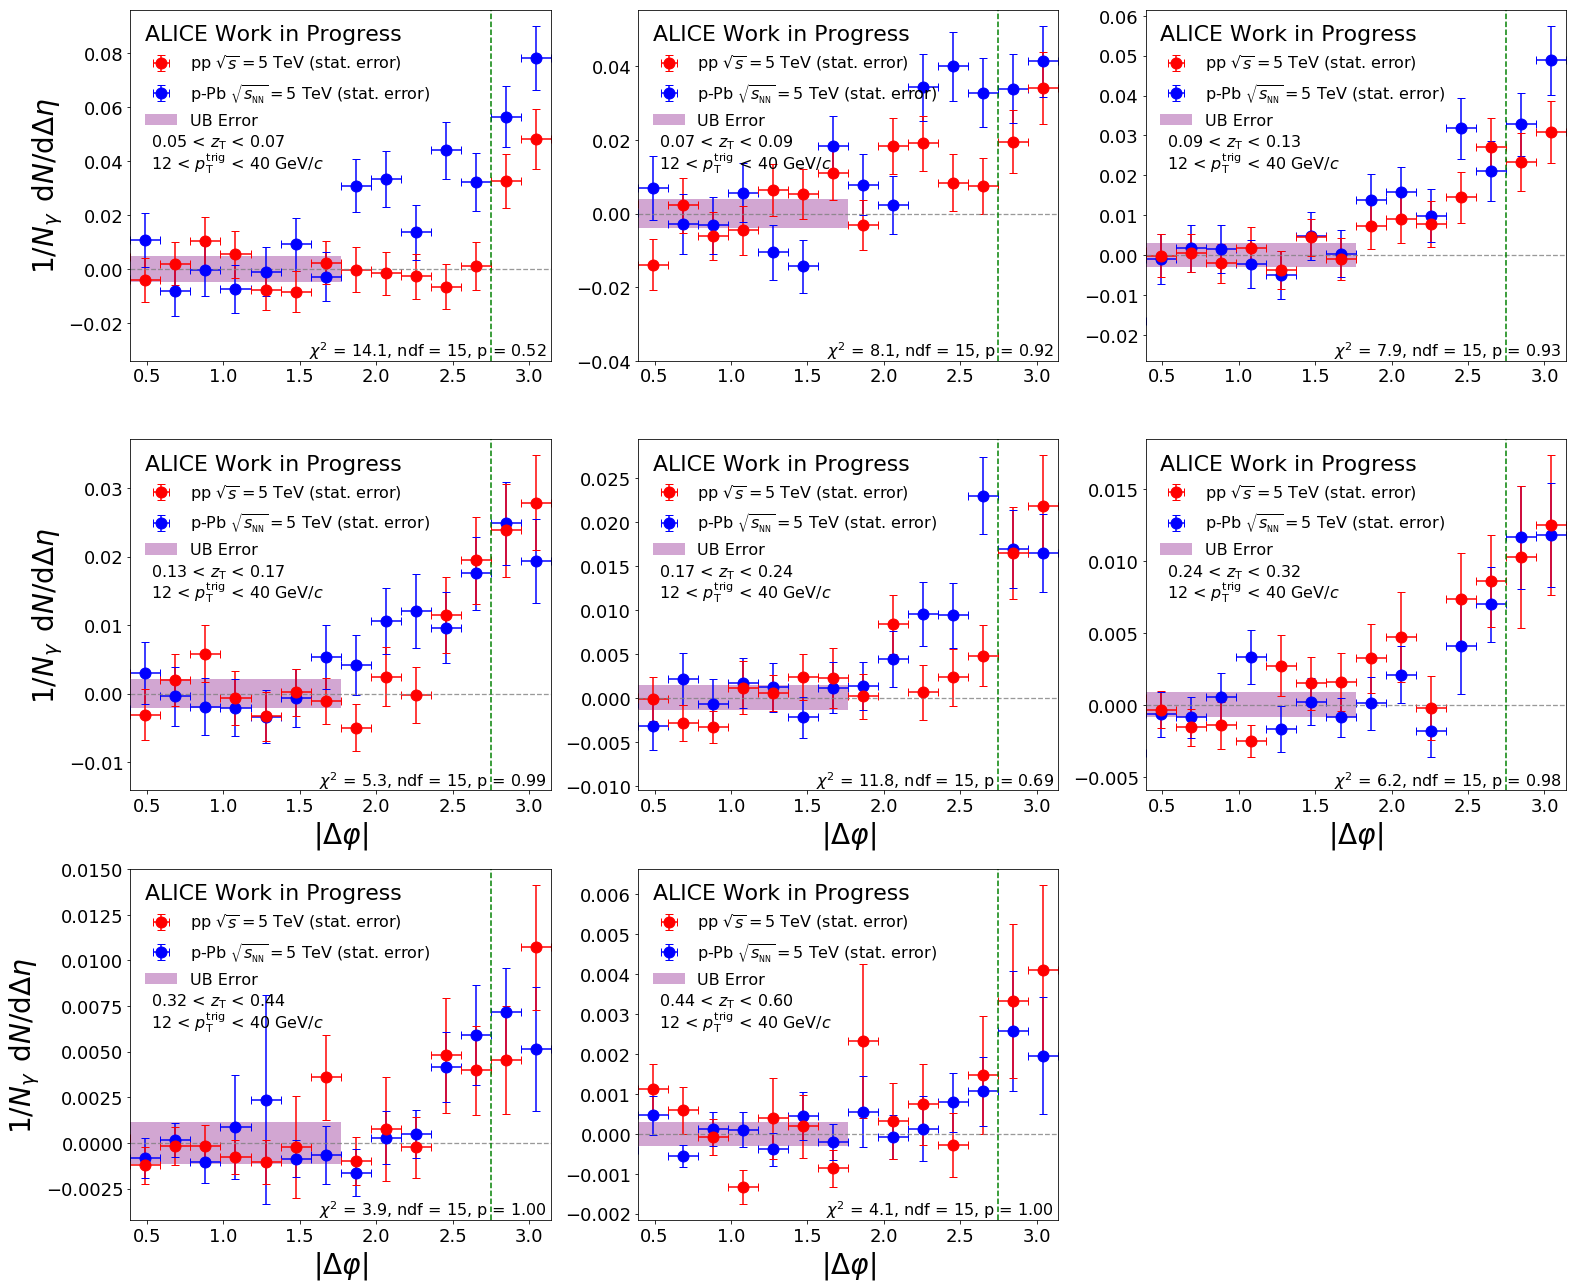

In [7]:
Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [8]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][5])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][5][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][5][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][5][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)

Number of Away side bins = 2
[ 0.00152317  0.00048895 -0.00032402 -0.00155831 -0.00143006 -0.00250128
  0.00273189  0.00148852  0.00159327  0.00323731  0.00470479 -0.00024418
  0.00737166  0.00860961  0.0102487   0.01245803]
pp
0.057822 +\- 0.017596 +\- 0.003189
0.3092751299199146
p-Pb
0.059641 +\- 0.012958 +\- 0.003077
0.22330192747570132


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [9]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [10]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
for i in range(len(Frags["pp_FF"][0])):
    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

0.200427 0.262019 0.208117 0.195567 0.211155 0.309275 0.307671 0.394741


In [11]:
reload(functions_fragmentation)
from functions_fragmentation import *

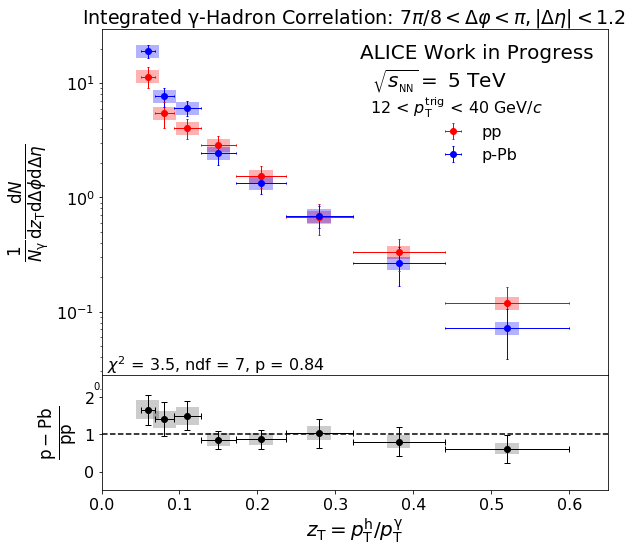

pp_purity_FF_Errors:
1.3806, 0.6579, 0.4904, 0.3457, 0.1864, 0.0812, 0.0398, 0.0143, 

p-Pb_FF_Errors:
2.5487, 1.4977, 0.9462, 0.5108, 0.2678, 0.1549, 0.0997, 0.0339, 

pp_FF:
11.4350, 5.4490, 4.0619, 2.8636, 1.5438, 0.6724, 0.3294, 0.1181, 

pp_FF_Errors:
2.2919, 1.4277, 0.8453, 0.5600, 0.3260, 0.2079, 0.1013, 0.0466, 

p-Pb_FF:
19.0454, 7.6549, 6.1070, 2.4446, 1.3466, 0.6935, 0.2659, 0.0722, 

p-Pb_purity_FF_Errors:
2.2994, 0.9242, 0.7373, 0.2951, 0.1626, 0.0837, 0.0321, 0.0087, 

zT Centers:
0.06, 0.08, 0.11, 0.15, 0.20, 0.28, 0.38, 0.52, 
zT Widths:
0.0090, 0.0125, 0.0170, 0.0230, 0.0315, 0.0430, 0.0590, 0.0800,


In [12]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [13]:
reload(functions_fragmentation)
from functions_fragmentation import *

[0.87488717 0.72713062 0.59788157 0.50165511 0.45967965 0.48621493
 0.57180118 0.69495343 0.83929494 0.99565244 1.15917367 1.32721343
 1.49825212 1.67136931 1.84598034 2.02169817 2.19825741 2.37547044
 2.55320113 2.73134844]
0.894754820995


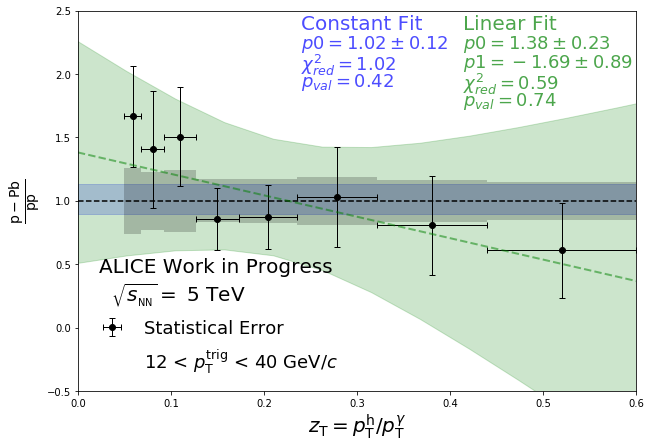

                Central Values:
[1.66553049 1.40482975 1.50349754 0.85368557 0.8722751  1.03144905
 0.80733466 0.61152468]

                Satistical Uncertainty Absolute:
[0.40138771 0.45938692 0.39009342 0.24430581 0.25303375 0.39346078
 0.39146427 0.37506826]

               Relative Satistical Uncertainty:
[0.24099691 0.3270054  0.2594573  0.28617774 0.2900848  0.3814641
 0.48488475 0.61333298]

                Ratio Uncertainty from Purity:
[0.23454258 0.20818939 0.21800359 0.15874168 0.16020796 0.17344596
 0.1551667  0.14151701]

                Ratio Uncertainty from Single Track Efficiency:
[0.11777079 0.09933646 0.10631333 0.06036469 0.06167916 0.07293446
 0.05708718 0.04324133]

                Full Systematic Uncertainty:
[0.26245034 0.23067413 0.24254502 0.16983172 0.17167094 0.18815668
 0.16533497 0.14797593]

****************************************
Minimizer is Linear
Chi2                      =      7.10942
NDf                       =            7
p0                   

In [14]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

###### Compare Different Binning

pT_Rebin_1_pDevNONE


IndexError: index 7 is out of bounds for axis 0 with size 7

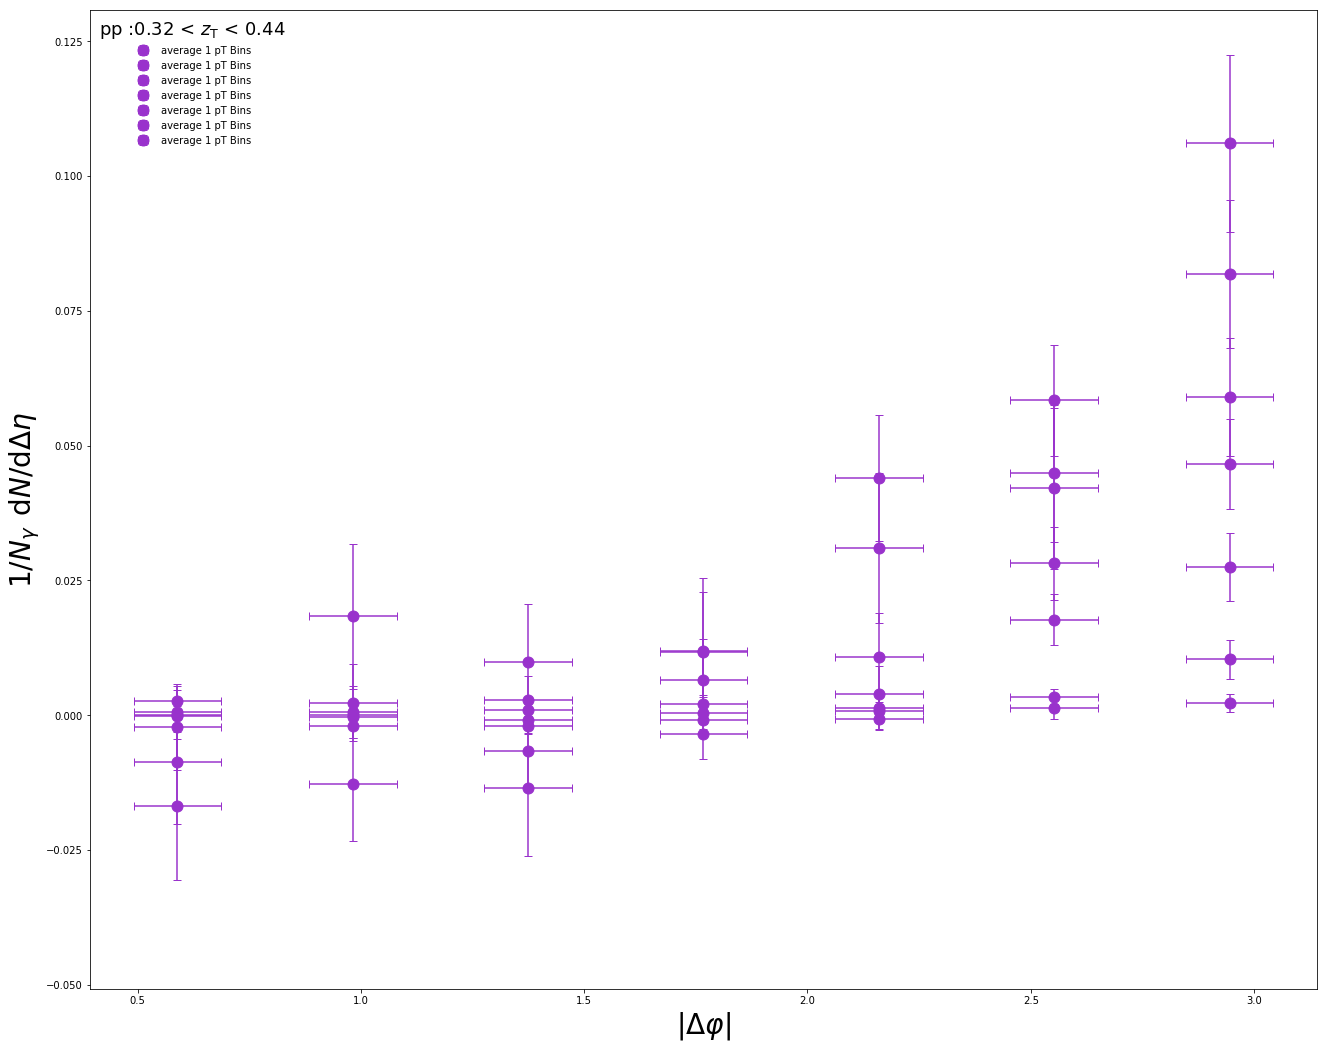

In [15]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)